In [36]:
import numpy as np                   
import imageio      # for loading image 

In [37]:
path = 'unpadded/' # path to the database 
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'

h = 116     # hight of image
w = 98      # image width
D = h * w       # feature vector
N = len(states)*15      # num of data point

X = np.zeros((D, N))

In [38]:
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        # fn: path of each image to the database
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        # convert image to feature vector
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

In [39]:
# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100 
pca.fit(X.T)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
# projection matrix 
U = pca.components_.T

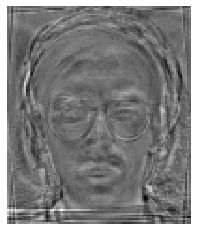

In [41]:
import matplotlib.pyplot as plt
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(116, 98), interpolation='nearest')
    # f1.axes.get_xaxis().set_visible(False)
    # f1.axes.get_yaxis().set_visible(False)
    plt.gray()
    fn = 'eigenface' + str(i).zfill(2) + '.png'
    # plt.savefig(fn, bbox_inches='tight', pad_inches=0)
    # plt.show()

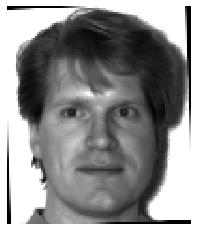

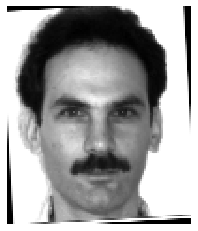

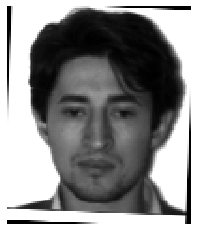

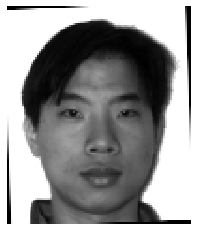

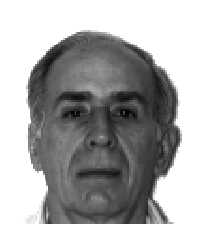

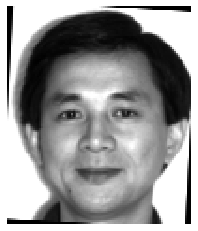

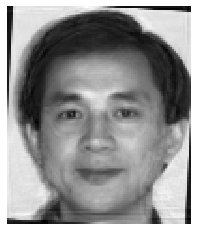

In [43]:
# See reconstruction of first 6 persons 
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        plt.axis('off')
        f1 = plt.imshow(im, interpolation='nearest')
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        # plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        # plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
        # encode
        z = U.T.dot(x)
        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(116, 98)
        plt.axis('off')
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
        # plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        # plt.show()

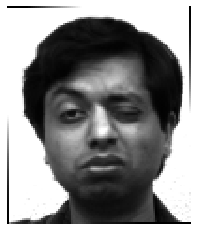

In [26]:
cnt = 0 
for person_id in [10]:
    for ii, state in enumerate(states):
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)
        f1 = plt.imshow(im, interpolation='nearest')
        fn = 'ex' + str(ii).zfill(2) +  '.png'
        plt.axis('off')
#         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
#         plt.show()
#         cnt += 1